In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
harr = 'C:\\Users\\Administrator\\Desktop\\python\\OpenCV\\haar-cascade-files-master'

In [6]:
ironman = cv2.imread( 'ironman.jpg' , 0 )
avengers = cv2.imread( 'Avengers.jpg' , 0 )

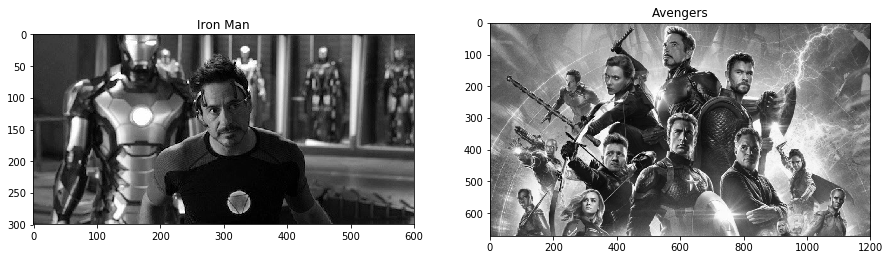

In [7]:
plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( ironman , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Avengers')
plt.imshow( avengers , cmap = 'gray')

# Face Detection

In [6]:
face_cascade_path = harr + '\\haarcascade_frontalface_default.xml'

face_cascade = cv2.CascadeClassifier(face_cascade_path)

In [7]:
def detect_face( img ):
    face_img = img.copy()
    
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for x , y , w , h in face_rect :
        cv2.rectangle( face_img , (x,y) , (x+w , y+h) , (255,255,255) , 10 )
        
    return face_img

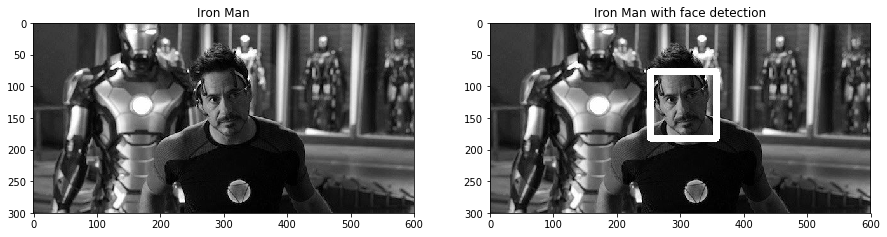

In [11]:
result = detect_face( ironman )

plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( ironman , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Iron Man with face detection')
plt.imshow( result , cmap = 'gray')

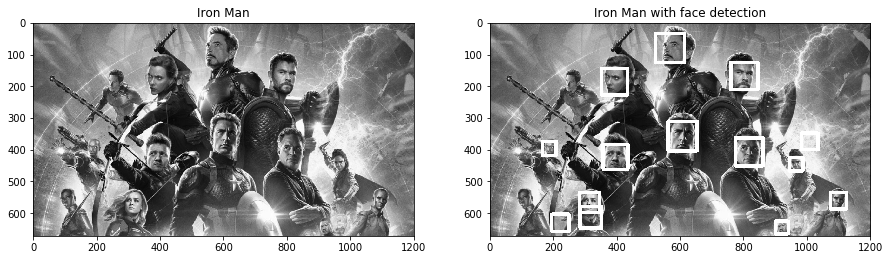

In [12]:
result = detect_face( avengers )

plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( avengers , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Iron Man with face detection')
plt.imshow( result , cmap = 'gray')

- Two Face detected , to solve this we need to introduce few parameters 

In [4]:
def detect_face( img ):
    face_img = img.copy()
    
    face_rect = face_cascade.detectMultiScale(face_img , scaleFactor = 1.2 , minNeighbors = 2 ) 
    
    for x , y , w , h in face_rect :
        cv2.rectangle( face_img , (x,y) , (x+w , y+h) , (255,255,255) , 10 )
        
    return face_img

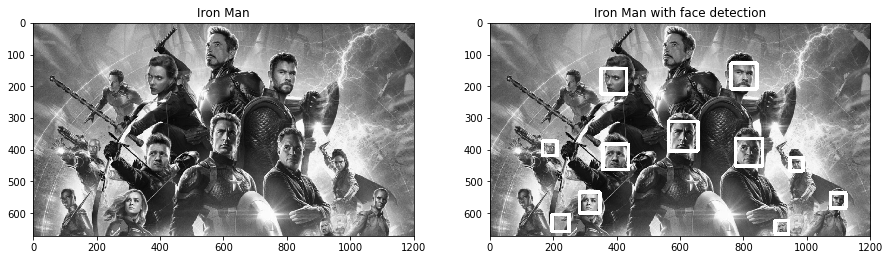

In [17]:
result = detect_face( avengers )

plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( avengers , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Iron Man with face detection')
plt.imshow( result , cmap = 'gray')

- Face pointing towards side directions are not detected 

# Eye Detection

In [18]:
eye_cascade_path = harr + '\\haarcascade_eye.xml'

eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

In [29]:
def detect_eye( img ):
    eye_img = img.copy()
    
    eye_rect = eye_cascade.detectMultiScale(eye_img , scaleFactor = 1.1  )
    
    for x , y , w , h in eye_rect :
        cv2.rectangle( eye_img , (x,y) , (x+w , y+h) , (255,255,255) , 10 )
        
    return eye_img

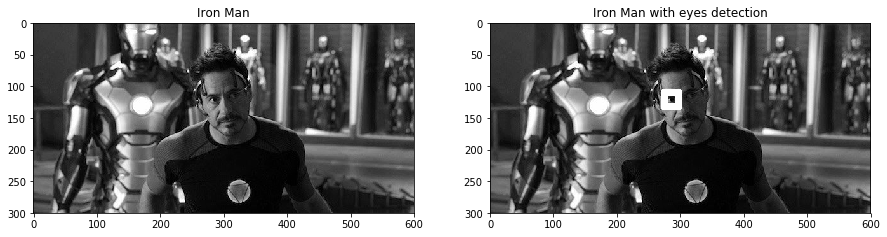

In [30]:
result = detect_eye( ironman )

plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( ironman , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Iron Man with eyes detection')
plt.imshow( result , cmap = 'gray')

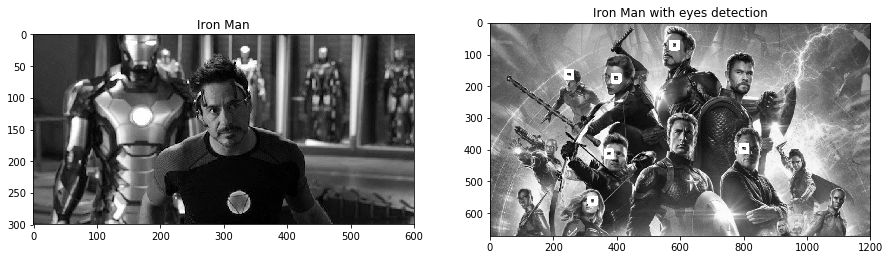

In [31]:
result = detect_eye( avengers )

plt.figure( figsize = (15 , 8) )

plt.subplot( 1 , 2 , 1 )
plt.title('Iron Man')
plt.imshow( ironman , cmap = 'gray')

plt.subplot( 1 , 2 , 2 )
plt.title('Iron Man with eyes detection')
plt.imshow( result , cmap = 'gray')

# Live Video Face Detection

In [8]:
cap = cv2.VideoCapture(0)

while True:
    
    ret , frame = cap.read(0)
    
    frame = detect_face( frame )
    
    cv2.imshow('Face Detection' , frame )
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()

cv2.destroyAllWindows()